# Домашнее задание по теме: пакет `seaborn`

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 21.0.1 from /home/ira/.local/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
# !conda install matplotlib numpy pandas seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [7]:
# загрузить датасет в pandas dataframe
df = pd.read_csv("./../../data/hotel_bookings.csv")

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Задание

**ВНИМАНИЕ:** при переносе этого файла в свой репозиторий необходимо дополнительно скопировать директорию `03_data_analysis/hw/images`, так как там содержаться изображения для задания.

- Далее в заданиях будут использованы сокращенные называния с помощью `(=название)`. Это нужно для удобства описания.
- Можно использовать любые названия для переменных.
- Графики должны быть максимально похожи на заданное изображение, но не обязательно идентичными
(по желанию можно менять что-то, сохраняя сложность построения изображения). Важные замечания будут даны в комментарии к конкретному графику (например: "Цвет из палитры CSS" значит ЛЮБЫЕ цвета из списка).

## Подготовка данных

In [8]:
# изменить полный dataframe:
# добавить новый столбец (=all_days), который является 
# суммой stays_in_week_nights (=weekdays) и stays_in_weekend_nights (=weekends)
df['stays_nights'] = df.stays_in_week_nights + df.stays_in_weekend_nights

# вывести первые 5 и последние 5 строк измененного dataframe
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


Для "маппинга" (замены) понадобиться метод [pandas.Series.map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

In [9]:
# изменить полный dataframe:
# добавить столбец (=is_ok) 
# с помощью "маппинга" колонки is_canceled (0 в 1, 1 в 0)
df["is_ok"] = df.is_canceled.map({0: 1, 1: 0})

# вывести перые 15 значений столбцов is_canceled и is_ok
# проверить, что они имеют в точности обратные значения
df[['is_canceled', 'is_ok']].head(15)

,is_canceled,is_ok
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [10]:
# сгруппировать данные по arrival_date_week_number 
# функция агрегации - сумма
# (=week_sum)
week_sum = df.groupby('arrival_date_week_number').sum()

# вывести week_sum
week_sum

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays_nights,is_ok
arrival_date_week_number,,,,,,,,,,,,,,,,,,,,,
1,353,64092,2111572,3395,1074,2416,2013,137.0,6,40,31,169,251,80284.0,2984.0,2275,85592.58,87,785,3490,694
2,395,56147,2456309,11826,949,2621,2027,78.0,12,89,80,393,237,88049.0,34737.0,1367,83209.44,87,710,3570,823
3,335,53115,2659974,21653,1041,3167,2128,112.0,15,98,170,326,394,91252.0,14004.0,922,88931.52,102,671,4208,984
4,506,68675,2998706,34520,906,3104,2500,73.0,8,95,132,565,407,144010.0,30315.0,7040,103080.69,115,693,4010,981
5,425,57024,2797010,24544,940,3054,2309,89.0,14,107,132,440,312,95447.0,22169.0,3445,94262.42,124,709,3994,962
6,385,59853,3040940,10671,1434,3594,2684,149.0,17,95,46,408,320,109142.0,39748.0,260,106330.27,106,871,5028,1123
7,684,103324,4252904,27288,1741,4535,3975,241.0,11,126,95,297,367,143495.0,50239.0,685,159735.30,135,1170,6276,1425
8,793,119545,4468679,44682,1554,4581,3870,180.0,13,84,242,407,363,137781.0,44081.0,386,166267.55,150,1068,6135,1423
9,724,100952,4268993,37402,1964,5437,3842,224.0,11,94,184,297,523,142085.0,34717.0,3989,159082.01,120,1085,7401,1393


In [11]:
# из датафрейма week_sum получить 
# значения стоблцов is_canceled и is_ok
# записать в новый датафрейм (=week_sum_canceled_ok)
week_sum_canceled_ok = week_sum[['is_canceled', 'is_ok']]

# вывести week_sum_canceled_ok
week_sum_canceled_ok

,is_canceled,is_ok
arrival_date_week_number,,
1,353,694
2,395,823
3,335,984
4,506,981
5,425,962
6,385,1123
7,684,1425
8,793,1423
9,724,1393


## `relplot`

**ВНИМАНИЕ:**

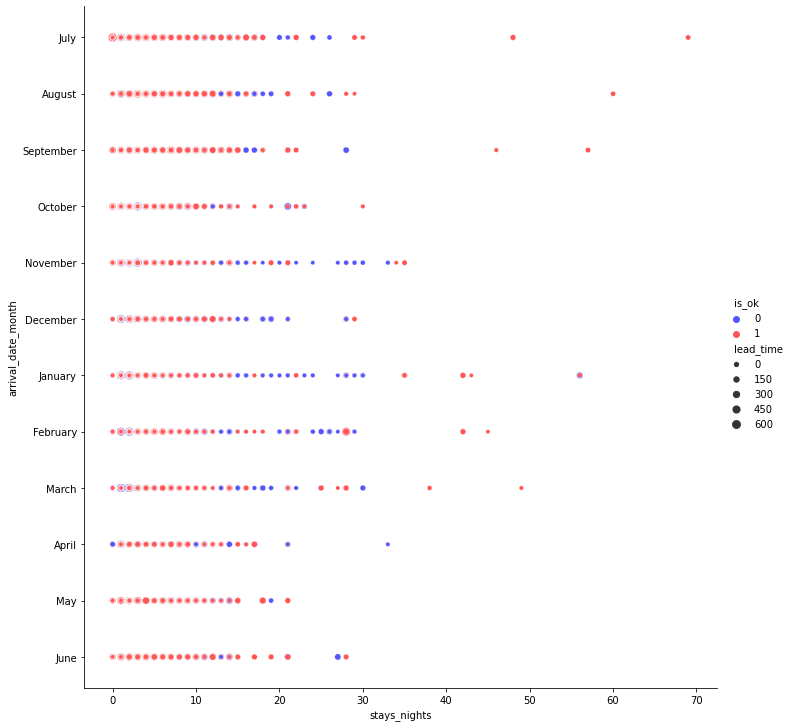

In [52]:
sns.relplot(data=df, 
            x='stays_nights', 
            y="arrival_date_month", 
            hue='is_ok',
            size="lead_time", 
            palette='seismic', 
            height=10)

## `scatterplot`

**ВНИМАНИЕ:**

In [48]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_nights,is_ok
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,1


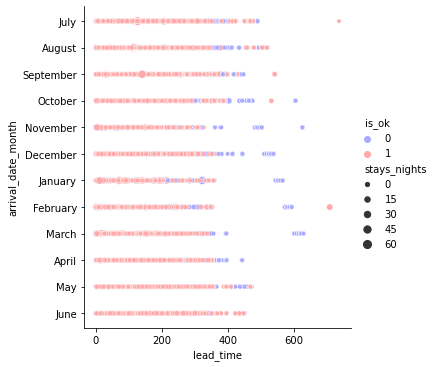

In [50]:
sns.relplot(data=df, 
            x='lead_time', 
            y="arrival_date_month", 
            hue='is_ok',
            size="stays_nights", 
            palette='bwr')

## `lineplot`

**ВНИМАНИЕ:**

## `displot`

**ВНИМАНИЕ:**

## `histplot`

**ВНИМАНИЕ:**

## `kdeplot`

**ВНИМАНИЕ:**

## `rugplot`

**ВНИМАНИЕ:**

## `catplot`

**ВНИМАНИЕ:**

## `stripplot`

**ВНИМАНИЕ:**

## `swarmplot`

**ВНИМАНИЕ:**

## `boxplot`

**ВНИМАНИЕ:**

## `violinplot`

**ВНИМАНИЕ:**

## `pointplot`

**ВНИМАНИЕ:**

## `barplot`

**ВНИМАНИЕ:**

## `countplot`

**ВНИМАНИЕ:**

## `jointplot`

**ВНИМАНИЕ:**

## `lmplot`

**ВНИМАНИЕ:**